### blibliotecas iniciais 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore")


### Blibliotecas para tratamento de imagem

In [2]:
from skimage.color import rgb2gray
from skimage.filters import try_all_threshold, threshold_otsu, threshold_local, gaussian
from skimage.transform import rotate, rescale
from skimage import morphology
import cv2

In [3]:
# G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight
# G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Healthy
# G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight

In [4]:
trainEarly = os.listdir('G:\\Meu Drive\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Early blight')
trainHeal = os.listdir('G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Healthy')
trainLate = os.listdir('G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight')


In [5]:
print('-----train-----')
print(len(trainHeal))
print(len(trainEarly))
print(len(trainLate))

-----train-----
2432
3532
3521


### Ai decidi Pegar apenas  as 2432 das saudaveis, e metade das Late e metade Early ou seja 1216 cada.

In [6]:
print(round(len(trainHeal)/2 ))
amostLen = round(len(trainHeal)/2)

1216


In [7]:
path1 = 'G:\\Meu Drive\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Early blight' ## não saudavel então pego só 1216
path2 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Healthy' ## saudavel pego todas
path3 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight' ## não saudavel então pego só 1216

In [35]:
path1 = 'G:\\Meu Drive\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Early blight' ## não saudavel então pego só 1216
path2 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Healthy' ## saudavel pego todas
path3 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight' ## não saudavel então pego só 1216

cont = 0
for i in os.listdir(path1):
    cont += 1
    print(path1 + "\\" + i)
    if cont == amostLen:
        break

G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(3020).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(2881).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(2729).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(3075).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(3050).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(3226).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(3308).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(3250).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(3274).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Early blight\PotatoEarlyBlight(3188).JPG
G:\Meu Drive\Renan-L

In [36]:
cont = 0
for i in os.listdir(path3):
    cont += 1
    print(path3 + "\\" + i)
    if cont == amostLen:
        break

G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3451).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3180).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3088).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3487).jpg
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3143).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3229).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3169).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3314).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3267).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Potato\train\Potato Late blight\PotatoLateBlight(3402).JPG
G:\Meu Drive\Renan-Lemes-TCC\dataset\Pot

In [ ]:
class Processing():
    def __init__(self, img, filename, path):
        self.img = img
        self.filename = filename
        self.path = path
        self.dimension = img.shape

    def corvertHSV(self):
        pass

    

In [9]:
# Função para mostrar na tela a imagem
def ShowImg(image, title='image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    plt.show()

In [10]:
img = plt.imread('G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight\\PotatoLateBlight(3451).JPG')
print(img)

[[[161 157 171]
  [162 158 172]
  [163 159 173]
  ...
  [174 168 180]
  [173 167 179]
  [170 164 176]]

 [[163 159 173]
  [163 159 173]
  [163 159 173]
  ...
  [177 171 183]
  [174 168 180]
  [172 166 178]]

 [[165 161 175]
  [164 160 174]
  [164 160 174]
  ...
  [178 172 184]
  [175 169 181]
  [173 167 179]]

 ...

 [[103  95 110]
  [103  95 110]
  [103  95 110]
  ...
  [115 107 120]
  [116 108 121]
  [117 109 122]]

 [[118 110 125]
  [116 108 123]
  [112 104 119]
  ...
  [121 113 126]
  [120 112 125]
  [116 108 121]]

 [[ 92  84  99]
  [ 95  87 102]
  [ 99  91 106]
  ...
  [123 115 128]
  [119 111 124]
  [111 103 116]]]


In [11]:
print(img.shape)
print(img[:, :, 0]) # red
print(img[:, :, 1]) # green
print(img[:, :, 2]) # blue


(256, 256, 3)
[[161 162 163 ... 174 173 170]
 [163 163 163 ... 177 174 172]
 [165 164 164 ... 178 175 173]
 ...
 [103 103 103 ... 115 116 117]
 [118 116 112 ... 121 120 116]
 [ 92  95  99 ... 123 119 111]]
[[157 158 159 ... 168 167 164]
 [159 159 159 ... 171 168 166]
 [161 160 160 ... 172 169 167]
 ...
 [ 95  95  95 ... 107 108 109]
 [110 108 104 ... 113 112 108]
 [ 84  87  91 ... 115 111 103]]
[[171 172 173 ... 180 179 176]
 [173 173 173 ... 183 180 178]
 [175 174 174 ... 184 181 179]
 ...
 [110 110 110 ... 120 121 122]
 [125 123 119 ... 126 125 121]
 [ 99 102 106 ... 128 124 116]]


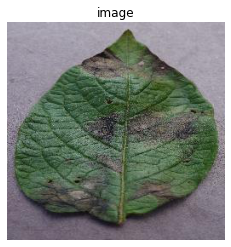

In [12]:
ShowImg(img)

In [ ]:
path1 = 'G:\\Meu Drive\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Early blight' ## não saudavel então pego só 1216
path2 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Healthy' ## saudavel pego todas
path3 = 'G:\\Meu Drive\\Renan-Lemes-TCC\\dataset\\Potato\\train\\Potato Late blight' ## não saudavel então pego só 1216


In [13]:
early_potato = list()
heal_potato = list()
late_potato = list()

In [14]:
amostLen

1216

In [15]:
cont = 0
for i in os.listdir(path1):
    cont += 1
    img = plt.imread(path1 + "\\" + i)
    early_potato.append(img)
    if cont == amostLen:
        break





KeyboardInterrupt: 

In [ ]:

cont = 0
for i in os.listdir(path2):
    cont += 1
    img = plt.imread(path2 + "\\" + i)
    heal_potato.append(img)

In [ ]:

cont = 0
for i in os.listdir(path3):
    cont +=1
    img = plt.imread(path3 + "\\" + i)
    late_potato.append(img)
    if cont == amostLen:
        break

# Notei que já separou as imagens e quantificou. Porem, ainda para tratar as imagens deixa tudo na mesma pasta inicialmente, somente separando as classes, inclusive porque voce não finalizou os experimentos com a extração de características.

# Agora as etapas de execução:
- Inserir aqui experimentos separando de cada canal de cor. Exemplo exibir a imagem do H, do S e do L e depois imagem do H, do S e do V. Não precisa ser de cada pasta de treino e validação, como voce vai juntar tudo inicialmente, faz 1 experimento de cada classe so. 

- Verificar o canal que mais tem contorno, sem tantas misturas de cores. 
- Realizar a equalização do histograma nesse canal separado
- juntar a imagem novamente para formar nova imagem e retornar para RGB. 

- Após isso, voce irá iniciar a extração de características. 
- indico usar inicialmente como extrator de características o SIFT. 
https://www.dominodatalab.com/blog/feature-extraction-and-image-classification-using-deep-neural-networks 

Somente após isso, siga para os experimentos com aprendizagem de máquina. 
Finalize esses passos acima e me avise para iniciarmos os treinamentos.